<a href="https://colab.research.google.com/github/Ernesto1717/NecstCamp/blob/main/Bio_image_project%5Ccolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import random
import numpy as np


from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

import nibabel as nib

IMG_WIDTH = 256
IMG_HEIGHT = 256 
IMG_CHANNELS = 1

#TRAIN_PATH = r"/content"
#LABELS_PATH = r"/content/drive/MyDrive/NECSTCamp/Labels"
#TEST_PATH = r"/content"

data_path = "/content/drive/MyDrive/BioImage/kits19/data/case_"

def extractImages( start, end):

    images = []
    
    prefix = '/imaging'

    postfix = ".nii.gz"    
    
    for out in tqdm(range(start, end)):
        img = nib.load(data_path + f'{out:05d}' + prefix + postfix ).get_fdata()
        img = (img - img.min()) / (max((img.max() - img.min()), 1e-3))
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH))
        '''
        kMax = int(img.shape[0]/10)
        for j in range(0, kMax):
            if((j*(kMax-1))-1 > 50 and j*(kMax-1)-1 < 256):
              images.append(resize(img[j*(kMax-1)-1, :, :], (IMG_HEIGHT, IMG_WIDTH)))
        print(out)
'''

        count=1 
        for j in range(0,int(img.shape[0]),12):
          if( j>20 and j<230):
            #print('paziente ',out,'slice ',count)
            images.append(resize(img[j,:,:], (IMG_HEIGHT, IMG_WIDTH)))
            count+=1
        print(out)


    return images

In [2]:
IMG_WIDTH = 256
IMG_HEIGHT = 256 
IMG_CHANNELS = 1

#TRAIN_PATH = r"/content"
#LABELS_PATH = r"/content/drive/MyDrive/NECSTCamp/Labels"
#TEST_PATH = r"/content"

data_path = "/content/drive/MyDrive/BioImage/kits19/data/case_"

def extractseg(start, end):
    images = []
    prefix = '/segmentation'
    postfix = ".nii.gz"    
    
    for out in tqdm(range(start, end)):
        img = nib.load(data_path + f'{out:05d}' + prefix + postfix ).get_fdata()
        img = (img - img.min()) / (max((img.max() - img.min()), 1e-3))
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH))
        
        count=1 
        for j in range(0,int(img.shape[0]),12):
          if( j>20 and j<230):
            #print('paziente ',out,'slice ',count)
            images.append(resize(img[j,:,:], (IMG_HEIGHT, IMG_WIDTH)))
            count+=1
        print(out)

    return images

In [3]:
UP_TRAIN = 85
UP_VALID = 115

train_img = np.array(extractImages(0,UP_TRAIN))
print('train_img done')
#train_prova = np.array(extractprova(0,UP_TRAIN))
train_label = np.array(extractseg(0,UP_TRAIN))
print('train_Label done')
valid_img = np.array(extractImages(UP_TRAIN+1,UP_VALID))
print('valid_img done')
valid_label = np.array(extractseg(UP_TRAIN+1,UP_VALID))
print('valid_label done')

  1%|          | 1/85 [00:23<33:24, 23.86s/it]

0


  2%|▏         | 2/85 [00:42<28:58, 20.95s/it]

1


  4%|▎         | 3/85 [00:51<21:16, 15.56s/it]

2


  5%|▍         | 4/85 [01:00<17:18, 12.82s/it]

3


  6%|▌         | 5/85 [01:04<12:44,  9.56s/it]

4


  7%|▋         | 6/85 [01:32<20:53, 15.87s/it]

5


  8%|▊         | 7/85 [01:38<16:29, 12.68s/it]

6


  9%|▉         | 8/85 [01:41<12:29,  9.73s/it]

7


 11%|█         | 9/85 [01:49<11:29,  9.07s/it]

8


 12%|█▏        | 10/85 [01:53<09:23,  7.51s/it]

9


 13%|█▎        | 11/85 [01:57<07:51,  6.38s/it]

10


 14%|█▍        | 12/85 [02:03<07:36,  6.26s/it]

11


 15%|█▌        | 13/85 [02:07<06:51,  5.71s/it]

12


 16%|█▋        | 14/85 [02:12<06:17,  5.32s/it]

13


 18%|█▊        | 15/85 [02:25<09:07,  7.81s/it]

14


 19%|█▉        | 16/85 [02:30<07:45,  6.74s/it]

15


 20%|██        | 17/85 [02:36<07:34,  6.69s/it]

16


 21%|██        | 18/85 [02:41<06:47,  6.08s/it]

17


 22%|██▏       | 19/85 [02:46<06:21,  5.79s/it]

18


 24%|██▎       | 20/85 [02:51<06:02,  5.58s/it]

19


 25%|██▍       | 21/85 [02:56<05:36,  5.26s/it]

20


 26%|██▌       | 22/85 [02:59<04:48,  4.57s/it]

21


 27%|██▋       | 23/85 [03:16<08:40,  8.40s/it]

22


 28%|██▊       | 24/85 [03:20<07:21,  7.23s/it]

23


 29%|██▉       | 25/85 [03:25<06:27,  6.45s/it]

24


 31%|███       | 26/85 [03:29<05:41,  5.79s/it]

25


 32%|███▏      | 27/85 [03:39<06:40,  6.90s/it]

26


 33%|███▎      | 28/85 [04:03<11:24, 12.00s/it]

27


 34%|███▍      | 29/85 [04:07<09:09,  9.81s/it]

28


 35%|███▌      | 30/85 [04:13<07:46,  8.48s/it]

29


 36%|███▋      | 31/85 [04:16<06:11,  6.87s/it]

30


 38%|███▊      | 32/85 [04:21<05:37,  6.37s/it]

31


 39%|███▉      | 33/85 [04:27<05:31,  6.37s/it]

32


 40%|████      | 34/85 [04:41<07:13,  8.51s/it]

33


 41%|████      | 35/85 [04:46<06:19,  7.58s/it]

34


 42%|████▏     | 36/85 [04:51<05:24,  6.62s/it]

35


 44%|████▎     | 37/85 [04:57<05:10,  6.46s/it]

36


 45%|████▍     | 38/85 [05:02<04:39,  5.95s/it]

37


 46%|████▌     | 39/85 [05:05<03:55,  5.13s/it]

38


 47%|████▋     | 40/85 [05:10<03:50,  5.12s/it]

39


 48%|████▊     | 41/85 [05:17<04:09,  5.67s/it]

40


 49%|████▉     | 42/85 [05:20<03:36,  5.04s/it]

41


 51%|█████     | 43/85 [05:30<04:29,  6.41s/it]

42


 52%|█████▏    | 44/85 [05:36<04:16,  6.26s/it]

43


 53%|█████▎    | 45/85 [05:41<03:51,  5.78s/it]

44


 54%|█████▍    | 46/85 [05:44<03:18,  5.10s/it]

45


 55%|█████▌    | 47/85 [05:50<03:22,  5.33s/it]

46


 56%|█████▋    | 48/85 [05:55<03:19,  5.40s/it]

47


 58%|█████▊    | 49/85 [06:00<03:01,  5.04s/it]

48


 59%|█████▉    | 50/85 [06:22<05:55, 10.16s/it]

49


 60%|██████    | 51/85 [06:26<04:48,  8.47s/it]

50


 61%|██████    | 52/85 [06:30<03:51,  7.02s/it]

51


 62%|██████▏   | 53/85 [06:51<05:59, 11.24s/it]

52


 64%|██████▎   | 54/85 [07:10<07:02, 13.64s/it]

53


 65%|██████▍   | 55/85 [07:15<05:26, 10.87s/it]

54


 66%|██████▌   | 56/85 [07:19<04:21,  9.00s/it]

55


 67%|██████▋   | 57/85 [07:24<03:37,  7.75s/it]

56


 68%|██████▊   | 58/85 [07:29<03:01,  6.73s/it]

57


 69%|██████▉   | 59/85 [07:33<02:37,  6.05s/it]

58


 71%|███████   | 60/85 [07:57<04:47, 11.52s/it]

59


 72%|███████▏  | 61/85 [08:03<03:57,  9.89s/it]

60


 73%|███████▎  | 62/85 [08:06<02:59,  7.79s/it]

61


 74%|███████▍  | 63/85 [08:11<02:28,  6.77s/it]

62


 75%|███████▌  | 64/85 [08:29<03:36, 10.30s/it]

63


 76%|███████▋  | 65/85 [08:32<02:43,  8.20s/it]

64


 78%|███████▊  | 66/85 [08:38<02:23,  7.54s/it]

65


 79%|███████▉  | 67/85 [08:52<02:46,  9.26s/it]

66


 80%|████████  | 68/85 [09:01<02:36,  9.23s/it]

67


 81%|████████  | 69/85 [09:21<03:20, 12.53s/it]

68


 82%|████████▏ | 70/85 [09:26<02:31, 10.11s/it]

69


 84%|████████▎ | 71/85 [09:30<01:56,  8.33s/it]

70


 85%|████████▍ | 72/85 [09:50<02:33, 11.80s/it]

71


 86%|████████▌ | 73/85 [09:57<02:04, 10.36s/it]

72


 87%|████████▋ | 74/85 [10:02<01:38,  8.92s/it]

73


 88%|████████▊ | 75/85 [10:07<01:15,  7.57s/it]

74


 89%|████████▉ | 76/85 [10:11<00:59,  6.63s/it]

75


 91%|█████████ | 77/85 [10:15<00:46,  5.79s/it]

76


 92%|█████████▏| 78/85 [10:19<00:37,  5.35s/it]

77


 93%|█████████▎| 79/85 [10:30<00:41,  6.92s/it]

78


 94%|█████████▍| 80/85 [10:35<00:32,  6.48s/it]

79


 95%|█████████▌| 81/85 [10:40<00:23,  5.87s/it]

80


 96%|█████████▋| 82/85 [10:45<00:17,  5.78s/it]

81


 98%|█████████▊| 83/85 [10:51<00:11,  5.66s/it]

82


 99%|█████████▉| 84/85 [10:55<00:05,  5.28s/it]

83


100%|██████████| 85/85 [11:04<00:00,  7.82s/it]

84


train_img done


  1%|          | 1/85 [00:13<18:13, 13.01s/it]

0


  2%|▏         | 2/85 [00:25<17:32, 12.68s/it]

1


  4%|▎         | 3/85 [00:30<12:47,  9.36s/it]

2


  5%|▍         | 4/85 [00:36<10:45,  7.97s/it]

3


  6%|▌         | 5/85 [00:39<08:07,  6.10s/it]

4


  7%|▋         | 6/85 [00:57<13:16, 10.08s/it]

5


  8%|▊         | 7/85 [01:01<10:28,  8.06s/it]

6


  9%|▉         | 8/85 [01:03<08:01,  6.25s/it]

7


 11%|█         | 9/85 [01:08<07:19,  5.78s/it]

8


 12%|█▏        | 10/85 [01:11<06:09,  4.92s/it]

9


 13%|█▎        | 11/85 [01:13<05:06,  4.14s/it]

10


 14%|█▍        | 12/85 [01:16<04:31,  3.72s/it]

11


 15%|█▌        | 13/85 [01:19<04:07,  3.44s/it]

12


 16%|█▋        | 14/85 [01:22<03:59,  3.37s/it]

13


 18%|█▊        | 15/85 [01:31<05:52,  5.04s/it]

14


 19%|█▉        | 16/85 [01:34<05:08,  4.47s/it]

15


 20%|██        | 17/85 [01:38<04:53,  4.31s/it]

16


 21%|██        | 18/85 [01:41<04:31,  4.06s/it]

17


 22%|██▏       | 19/85 [01:45<04:16,  3.89s/it]

18


 24%|██▎       | 20/85 [01:48<04:03,  3.74s/it]

19


 25%|██▍       | 21/85 [01:51<03:46,  3.53s/it]

20


 26%|██▌       | 22/85 [01:54<03:18,  3.16s/it]

21


 27%|██▋       | 23/85 [02:05<05:46,  5.59s/it]

22


 28%|██▊       | 24/85 [02:08<05:01,  4.93s/it]

23


 29%|██▉       | 25/85 [02:11<04:17,  4.29s/it]

24


 31%|███       | 26/85 [02:14<03:51,  3.93s/it]

25


 32%|███▏      | 27/85 [02:21<04:34,  4.74s/it]

26


 33%|███▎      | 28/85 [02:35<07:19,  7.71s/it]

27


 34%|███▍      | 29/85 [02:38<05:52,  6.30s/it]

28


 35%|███▌      | 30/85 [02:42<05:00,  5.47s/it]

29


 36%|███▋      | 31/85 [02:44<04:03,  4.51s/it]

30


 38%|███▊      | 32/85 [02:47<03:37,  4.11s/it]

31


 39%|███▉      | 33/85 [02:52<03:36,  4.16s/it]

32


 40%|████      | 34/85 [02:59<04:19,  5.10s/it]

33


 41%|████      | 35/85 [03:02<03:48,  4.58s/it]

34


 42%|████▏     | 36/85 [03:05<03:20,  4.09s/it]

35


 44%|████▎     | 37/85 [03:09<03:12,  4.00s/it]

36


 45%|████▍     | 38/85 [03:12<02:58,  3.79s/it]

37


 46%|████▌     | 39/85 [03:15<02:33,  3.33s/it]

38


 47%|████▋     | 40/85 [03:18<02:25,  3.24s/it]

39


 48%|████▊     | 41/85 [03:22<02:37,  3.59s/it]

40


 49%|████▉     | 42/85 [03:25<02:21,  3.30s/it]

41


 51%|█████     | 43/85 [03:31<02:55,  4.18s/it]

42


 52%|█████▏    | 44/85 [03:35<02:50,  4.15s/it]

43


 53%|█████▎    | 45/85 [03:38<02:31,  3.79s/it]

44


 54%|█████▍    | 46/85 [03:41<02:14,  3.44s/it]

45


 55%|█████▌    | 47/85 [03:44<02:14,  3.55s/it]

46


 56%|█████▋    | 48/85 [03:48<02:12,  3.59s/it]

47


 58%|█████▊    | 49/85 [03:51<01:59,  3.33s/it]

48


 59%|█████▉    | 50/85 [04:04<03:41,  6.34s/it]

49


 60%|██████    | 51/85 [04:07<03:01,  5.33s/it]

50


 61%|██████    | 52/85 [04:10<02:29,  4.53s/it]

51


 62%|██████▏   | 53/85 [04:24<03:53,  7.29s/it]

52


 64%|██████▎   | 54/85 [04:35<04:26,  8.61s/it]

53


 65%|██████▍   | 55/85 [04:39<03:35,  7.18s/it]

54


 66%|██████▌   | 56/85 [04:42<02:54,  6.00s/it]

55


 67%|██████▋   | 57/85 [04:45<02:21,  5.05s/it]

56


 68%|██████▊   | 58/85 [04:48<01:57,  4.34s/it]

57


 69%|██████▉   | 59/85 [04:51<01:42,  3.94s/it]

58


 71%|███████   | 60/85 [05:06<03:04,  7.36s/it]

59


 72%|███████▏  | 61/85 [05:10<02:29,  6.22s/it]

60


 73%|███████▎  | 62/85 [05:12<01:55,  5.00s/it]

61


 74%|███████▍  | 63/85 [05:15<01:37,  4.42s/it]

62


 75%|███████▌  | 64/85 [05:26<02:15,  6.45s/it]

63


 76%|███████▋  | 65/85 [05:29<01:44,  5.25s/it]

64


 78%|███████▊  | 66/85 [05:32<01:27,  4.59s/it]

65


 79%|███████▉  | 67/85 [05:41<01:47,  5.95s/it]

66


 80%|████████  | 68/85 [05:46<01:38,  5.81s/it]

67


 81%|████████  | 69/85 [05:59<02:06,  7.93s/it]

68


 82%|████████▏ | 70/85 [06:02<01:36,  6.43s/it]

69


 84%|████████▎ | 71/85 [06:05<01:13,  5.24s/it]

70


 85%|████████▍ | 72/85 [06:17<01:37,  7.49s/it]

71


 86%|████████▌ | 73/85 [06:21<01:17,  6.47s/it]

72


 87%|████████▋ | 74/85 [06:25<01:01,  5.62s/it]

73


 88%|████████▊ | 75/85 [06:28<00:47,  4.77s/it]

74


 89%|████████▉ | 76/85 [06:31<00:37,  4.18s/it]

75


 91%|█████████ | 77/85 [06:33<00:30,  3.79s/it]

76


 92%|█████████▏| 78/85 [06:36<00:24,  3.48s/it]

77


 93%|█████████▎| 79/85 [06:43<00:27,  4.55s/it]

78


 94%|█████████▍| 80/85 [06:47<00:20,  4.16s/it]

79


 95%|█████████▌| 81/85 [06:49<00:14,  3.74s/it]

80


 96%|█████████▋| 82/85 [06:53<00:11,  3.72s/it]

81


 98%|█████████▊| 83/85 [06:56<00:07,  3.66s/it]

82


 99%|█████████▉| 84/85 [06:59<00:03,  3.40s/it]

83


100%|██████████| 85/85 [07:05<00:00,  5.01s/it]

84


train_Label done


  3%|▎         | 1/29 [00:06<03:01,  6.48s/it]

86


  7%|▋         | 2/29 [00:09<02:07,  4.71s/it]

87


 10%|█         | 3/29 [00:14<02:05,  4.83s/it]

88


 14%|█▍        | 4/29 [00:18<01:45,  4.22s/it]

89


 17%|█▋        | 5/29 [00:22<01:40,  4.20s/it]

90


 21%|██        | 6/29 [00:46<04:13, 11.03s/it]

91


 24%|██▍       | 7/29 [00:51<03:14,  8.86s/it]

92


 28%|██▊       | 8/29 [01:15<04:48, 13.73s/it]

93


 31%|███       | 9/29 [01:19<03:34, 10.70s/it]

94


 34%|███▍      | 10/29 [01:29<03:19, 10.53s/it]

95


 38%|███▊      | 11/29 [01:52<04:18, 14.34s/it]

96


 41%|████▏     | 12/29 [01:57<03:13, 11.41s/it]

97


 45%|████▍     | 13/29 [02:05<02:49, 10.58s/it]

98


 48%|████▊     | 14/29 [02:10<02:11,  8.76s/it]

99


 52%|█████▏    | 15/29 [02:26<02:32, 10.92s/it]

100


 55%|█████▌    | 16/29 [02:43<02:45, 12.72s/it]

101


 59%|█████▊    | 17/29 [02:53<02:24, 12.02s/it]

102


 62%|██████▏   | 18/29 [03:15<02:44, 14.92s/it]

103


 66%|██████▌   | 19/29 [03:20<02:00, 12.02s/it]

104


 69%|██████▉   | 20/29 [03:26<01:32, 10.27s/it]

105


 72%|███████▏  | 21/29 [03:31<01:09,  8.63s/it]

106


 76%|███████▌  | 22/29 [03:35<00:51,  7.29s/it]

107


 79%|███████▉  | 23/29 [03:39<00:37,  6.17s/it]

108


 83%|████████▎ | 24/29 [03:44<00:28,  5.77s/it]

109


 86%|████████▌ | 25/29 [03:47<00:20,  5.07s/it]

110


 90%|████████▉ | 26/29 [03:54<00:16,  5.53s/it]

111


 93%|█████████▎| 27/29 [03:58<00:10,  5.31s/it]

112


 97%|█████████▋| 28/29 [04:01<00:04,  4.66s/it]

113


100%|██████████| 29/29 [04:12<00:00,  8.69s/it]

114


valid_img done


  3%|▎         | 1/29 [00:04<02:06,  4.52s/it]

86


  7%|▋         | 2/29 [00:06<01:26,  3.22s/it]

87


 10%|█         | 3/29 [00:09<01:19,  3.07s/it]

88


 14%|█▍        | 4/29 [00:12<01:09,  2.79s/it]

89


 17%|█▋        | 5/29 [00:15<01:08,  2.84s/it]

90


 21%|██        | 6/29 [00:30<02:47,  7.27s/it]

91


 24%|██▍       | 7/29 [00:33<02:09,  5.87s/it]

92


 28%|██▊       | 8/29 [00:49<03:11,  9.13s/it]

93


 31%|███       | 9/29 [00:52<02:20,  7.01s/it]

94


 34%|███▍      | 10/29 [00:58<02:07,  6.71s/it]

95


 38%|███▊      | 11/29 [01:11<02:36,  8.71s/it]

96


 41%|████▏     | 12/29 [01:14<01:57,  6.89s/it]

97


 45%|████▍     | 13/29 [01:18<01:39,  6.21s/it]

98


 48%|████▊     | 14/29 [01:22<01:19,  5.31s/it]

99


 52%|█████▏    | 15/29 [01:31<01:29,  6.39s/it]

100


 55%|█████▌    | 16/29 [01:40<01:36,  7.45s/it]

101


 59%|█████▊    | 17/29 [01:46<01:23,  6.99s/it]

102


 62%|██████▏   | 18/29 [02:00<01:37,  8.84s/it]

103


 66%|██████▌   | 19/29 [02:03<01:11,  7.16s/it]

104


 69%|██████▉   | 20/29 [02:06<00:55,  6.12s/it]

105


 72%|███████▏  | 21/29 [02:10<00:42,  5.35s/it]

106


 76%|███████▌  | 22/29 [02:13<00:31,  4.56s/it]

107


 79%|███████▉  | 23/29 [02:15<00:23,  3.97s/it]

108


 83%|████████▎ | 24/29 [02:18<00:17,  3.55s/it]

109


 86%|████████▌ | 25/29 [02:20<00:12,  3.15s/it]

110


 90%|████████▉ | 26/29 [02:24<00:10,  3.37s/it]

111


 93%|█████████▎| 27/29 [02:27<00:06,  3.32s/it]

112


 97%|█████████▋| 28/29 [02:30<00:03,  3.09s/it]

113


100%|██████████| 29/29 [02:36<00:00,  5.39s/it]

114


valid_label done


In [ ]:
import numpy
import matplotlib.pyplot as plt

slice = 7
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(train_img[slice,:,:])
imgplot_seg = plt.imshow(train_label[slice,:,:])
a = fig.add_subplot(1,2,2)
plt.clf()  
for i in range (0,len(train_img),1):
  print("layer_",i,"img:")
  imgplot = plt.imshow(train_img[i,:,:])
  plt.show()
  print("layer_",i,"label:")
  imgplot_seg = plt.imshow(train_label[i,:,:])
  plt.show()
  #print("layer_",i,"prova:")
  #imgplot_seg = plt.imshow(train_prova[i,:,:])
  #plt.show()

print('-----------train printed--------------')  
print('-----------train printed--------------')  
print('-----------train printed--------------')  
for i in range (0,len(valid_img),1):
  print("layer_",i,"img:")
  imgplot = plt.imshow(valid_img[i,:,:])
  plt.show()
  print("layer_",i,"label:")
  imgplot_seg = plt.imshow(valid_label[i,:,:])
  plt.show()  

In [4]:
import tensorflow
import keras 

In [5]:
def uNet():

    #Contraction path
    # 256x256
    c1 = tf.keras.layers.Conv2D(
        16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(256, 256, 1))(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c1)

    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    # 128x128
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p1)

    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c2)

    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    # 64x64
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c3)

    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
    # 32x32
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c4)

    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
    # 16x16
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(
        128, (2, 2), strides=(2, 2), padding='same')(c5)
    # 32x32
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c6)

    # 64x64
    u7 = tf.keras.layers.Conv2DTranspose(
        64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c7)

    # 128x128
    u8 = tf.keras.layers.Conv2DTranspose(
        32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c8)

    # 256x256
    u9 = tf.keras.layers.Conv2DTranspose(
        16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    return outputs

In [35]:
#Build the model
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Building the model...')
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

outputs = uNet()

adam = tf.keras.optimizers.Adam(learning_rate=0.000015)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

'''
model.compile(optimizer= optimizer, 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])
'''             


#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    'model_for_nuclei.h5', verbose=1, save_best_only=True
    )

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
    ]

results = model.fit(train_img, train_label, validation_split=0.1,
                    batch_size=15, epochs=15, callbacks=callbacks)

####################################

idx = random.randint(0, len(train_img))


preds_train = model.predict(train_img[:int(train_img.shape[0]*0.9)], verbose=1)
preds_val = model.predict(train_img[int(train_img.shape[0]*0.9):], verbose=1)
preds_test = model.predict(valid_img, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Building the model...
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 lambda_7 (Lambda)              (None, 256, 256, 1)  0           ['input_8[0][0]']                
                                                                                                  
 conv2d_133 (Conv2D)            (None, 256, 256, 16  160         ['lambda_7[0][0]']               
                                )                                                                 
                                     

-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Sanity check: 
label (256, 256)


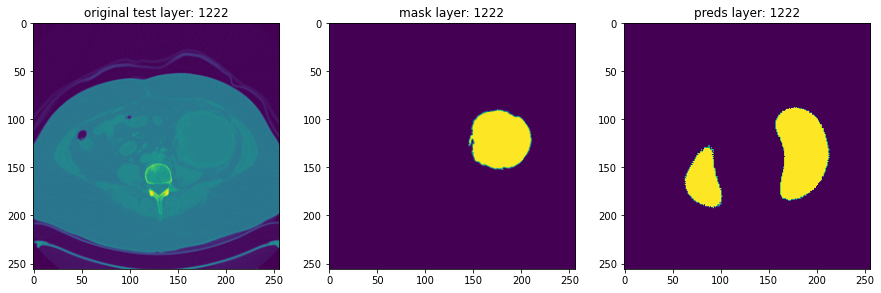

label (256, 256)


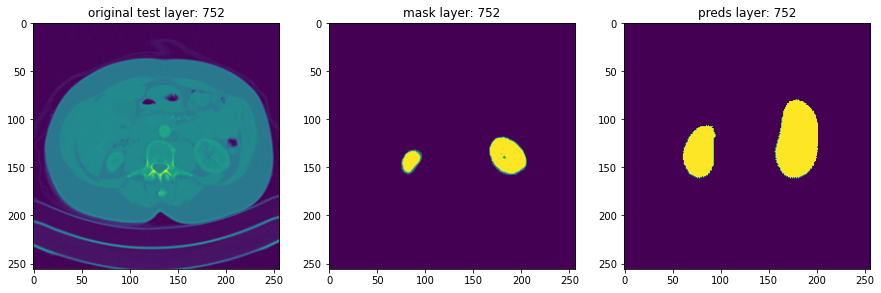

label (256, 256)


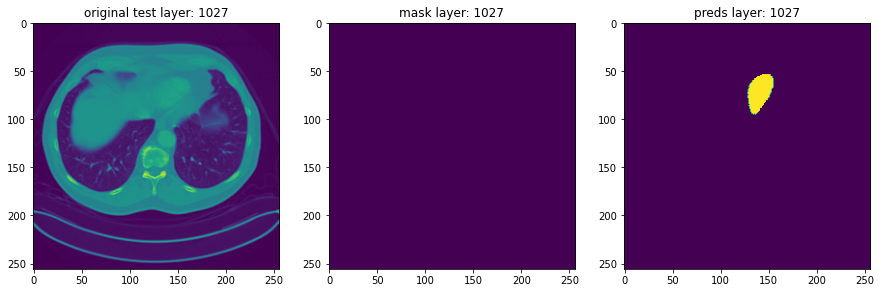

label (256, 256)


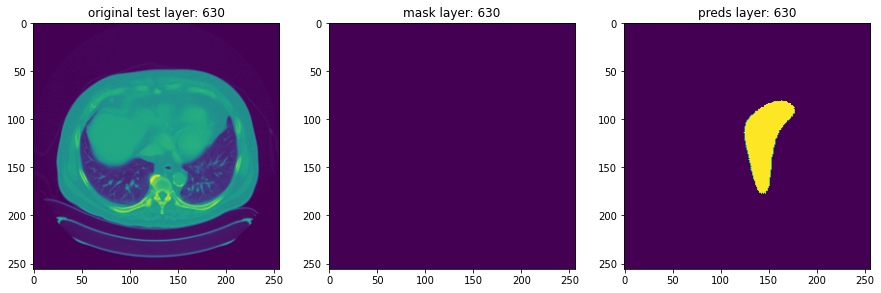

label (256, 256)


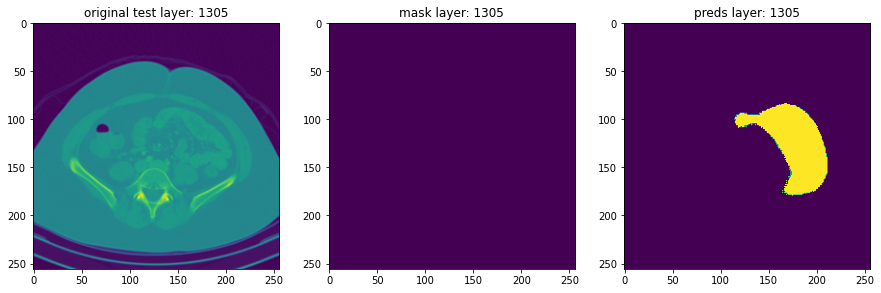

In [37]:
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
# 1
sanityCheck(train_img, train_label, preds_train_t)

sanityCheck(train_img, train_label, preds_train_t)
# 3
sanityCheck(train_img, train_label, preds_train_t)
# 4
sanityCheck(train_img, train_label, preds_train_t)
# 5
sanityCheck(train_img, train_label, preds_train_t)

In [7]:
def sanityCheck(train_img, train_label, preds_train_t):
    ix = random.randint(0, len(preds_train_t))

    fig, ax = plt.subplots(1, 3,figsize=(15,5))

    ax[0].imshow(train_img[ix])
    ax[0].set_title("original test layer: " + str(ix) )

    print('label',train_label[ix].shape)

    ax[1].imshow(train_label[ix])
    ax[1].set_title("mask layer: " + str(ix) )

    ax[2].imshow(preds_train_t[ix][:, :, 0])
    ax[2].set_title("preds layer: " + str(ix) )

    plt.show()